#Dataset IMDB

## O IMDB (The Movie Database) é um daset abrangente que fornece informações sobre filmes, incluindo detalhes como títulos, imdb (avaliação), ano de lançamento, receita, gêneros e muito mais.

# Carregando os dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
dados_id = '1Gn9qxiJSCQqzW6NIzU_awrfe21Wl489V'
url = f'https://drive.google.com/uc?id={dados_id}'
dados = pd.read_csv(url, usecols=['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating',
                                  'Overview', 'Meta_score', 'Director', 'Gross'])
dados.columns=['titulo', 'ano_lancamento', 'classificacao', 'duracao', 'genero', 'imdb', 'descricao', 'critica', 'diretor', 'renda']

# Limpando os dados

In [3]:
#tratando valores faltantes
dados['classificacao'] = dados['classificacao'].fillna('Desconhecido')
dados['critica'] = dados['critica'].fillna('Sem avaliação')
dados['renda'] = dados['renda'].fillna(0)
#convertendo tipos
dados['ano_lancamento'] = dados['ano_lancamento'].astype(int)
dados[['titulo', 'genero', 'descricao', 'diretor', 'classificacao']] =dados[['titulo', 'genero', 'descricao', 'diretor', 'classificacao']].astype('string')
#transformando dados
dados['duracao'] = dados['duracao'].str.extract(r'(\d+)', expand=False).str.strip().astype(int)
dados['renda'] = dados['renda'].str.replace(',','').fillna(0).astype(int)
#criando a coluna decada dos filmes
dados['decada'] = (dados['ano_lancamento']//10) * 10
#criando coluna genero principal
dados['genero_principal'] = dados['genero'].apply(lambda x: x.split(',')[0])

In [4]:
dados.head()

,titulo,ano_lancamento,classificacao,duracao,genero,imdb,descricao,critica,diretor,renda,decada,genero_principal
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80,Frank Darabont,28341469,1990,Drama
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,134966411,1970,Crime
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,534858444,2000,Action
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,57300000,1970,Crime
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,4360000,1950,Crime


# Descrição do Dataset
## As colunas principais incluem:

* ## titulo: Título do filme.
* ## genero: Gênero(s) do filme.
* ## diretor: Nome do diretor.
* ## ano_lancamento: Ano de lançamento.
* ## duracao: Duração do filme (em minutos).
* ## imdb: Nota do filme no IMDb.
* ## critica: Nota do filme pela crítica (Metascore).
* ## renda: Receita bruta (em dólares).
* ## classificacao: Classificação indicativa.
* ## decada: dácada do filme
* ## genero_principal: o gênero predominante do filme

## O seu trabalho será realizar diversas análises sobre os dados usando todos os seus conhecimento adquiridos durante a disciplina. Será avaliado a ambrangência dos conhecimentos utilizados e a qualidade das analises realizadas.

## Explore perguntas que você queira responder, por exemplo, quantos filmes existem no catálogo? quais os filmes mais longos? qual o top 5 melhores filmes da decada de 2000? Quais os filmes dirigidos por Christopher Nolan? Qual a media de imdb dos filmes por década? dentre outros, crie suas próprias perguntas :)

## Crie gráficos usando as bibliotecas seaborn e plotly. Por exemplo, gráficos que mostre contagem (barras ou pizza) de filmes por decáda, boxplot para mostrar a distribuição das notas IMDb por decada, gráfico de barras para mostrar os 10 diretores com mais filmes, gráfico de linha mostrando a evolução da receita bruta média por década, dentre outros.




# Daqui para frente é com você, let's go!

# 1. Os filmes com maiores receitas brutas em (dólares)

In [ ]:
maiores_rendas = dados.sort_values(by='renda' , ascending=False).head(3)

fig = px.bar(maiores_rendas ,
             x='titulo',
             y='renda',
             title='Os filmes com maiores receitas brutas em (dólares)',
             color='ano_lancamento')

fig.update_layout(
    xaxis_title = 'Titulo' ,
    yaxis_title = "Renda"
)

fig.show()


# 2. Relação entre gênero de filme e renda bruta

In [ ]:
maiores_rendas = dados.sort_values(by='renda' , ascending=False)

px.pie(maiores_rendas ,
       names='genero_principal' ,
       values='renda',
       title='Relação entre gênero de filme e renda bruta'
       )

# 3. Quais foram as décadas que lançaram mais filmes.

Text(0, 0.5, 'Filmes lançados')

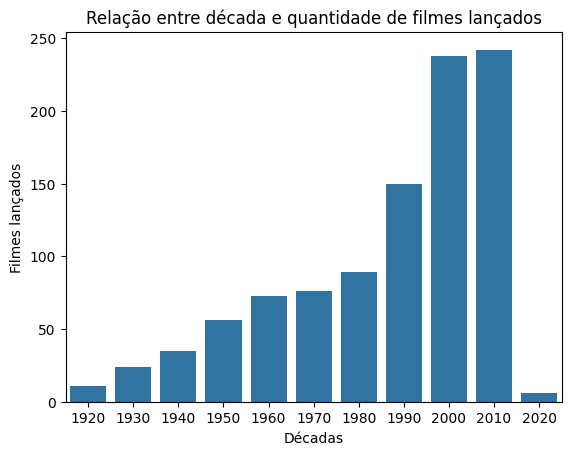

In [ ]:
sns.countplot(data=dados, x='decada')
plt.title('Relação entre década e quantidade de filmes lançados')
plt.xlabel('Décadas')
plt.ylabel('Filmes lançados')

#4. Distribuição da duração dos filmes por classificação



In [ ]:
import plotly.express as px

fig = px.box(
    dados,
    x="classificacao",
    y="duracao",
    color="classificacao",
    title="Distribuição da Duração dos Filmes por Classificação",
    labels={"classificacao": "Classificação", "duracao": "Duração (minutos)"},
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    xaxis_title="Classificação",
    yaxis_title="Duração (minutos)",
    title_font_size=16,
    xaxis_tickangle=-45
)

fig.show()


#5. Top 10 diretores com maior número de filmes

<ipython-input-9-fd5d85e769d3>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




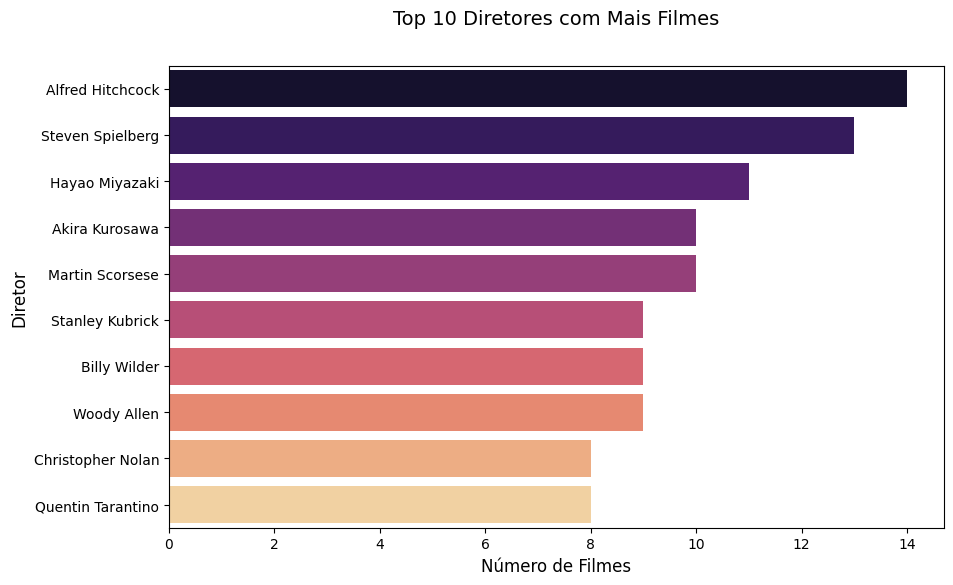

In [ ]:

director_counts = dados['diretor'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette="magma")
plt.title("Top 10 Diretores com Mais Filmes", fontsize=14, pad=30)
plt.xlabel("Número de Filmes", fontsize=12)
plt.ylabel("Diretor", fontsize=12)
plt.show()


#6. Comparação da avaliação (IMDB) entre os gêneros principais

<ipython-input-10-f9b76382e9ff>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




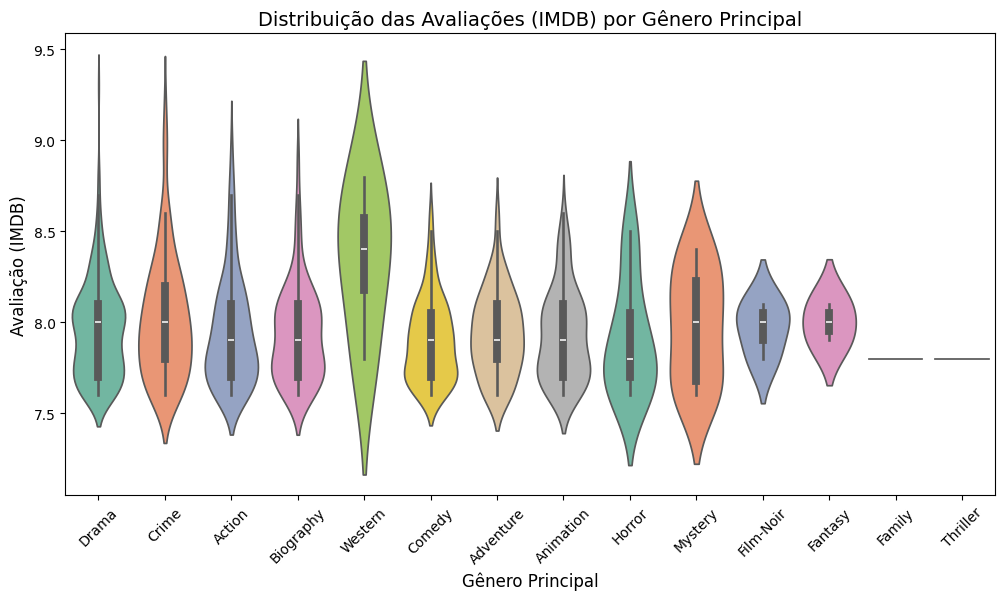

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=dados, x="genero_principal", y="imdb", palette="Set2")
plt.title("Distribuição das Avaliações (IMDB) por Gênero Principal", fontsize=14)
plt.xlabel("Gênero Principal", fontsize=12)
plt.ylabel("Avaliação (IMDB)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


#6. Receita média por década

In [ ]:
import plotly.express as px

revenue_by_decade = dados.groupby('decada')['renda'].mean().reset_index()

fig = px.line(revenue_by_decade, x='decada', y='renda',
              title="Receita Média dos Filmes por Década",
              labels={'decada': 'Década', 'renda': 'Receita Média (em milhões)'},
              markers=True, line_shape='linear',
              template='plotly_dark',
              line_dash_sequence=['solid'])

for i in range(len(revenue_by_decade)):
    fig.add_annotation(
        x=revenue_by_decade['decada'][i],
        y=revenue_by_decade['renda'][i],
        text=f"{revenue_by_decade['renda'][i]:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        ax=0,
        ay=-40,
        font=dict(size=10, color="white")
    )


fig.update_layout(
    xaxis_title="Década",
    yaxis_title="Receita Média (em milhões)",
    plot_bgcolor='rgba(0,0,0,0)',
    hovermode="x unified",
    width=800,
    height=600
)

# Exibir o gráfico
fig.show()
